In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


%cd /content/drive/My\ Drive/
%cd broutanlab_course/

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/broutanlab_course


In [8]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [4]:
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")

In [34]:
image = cv2.imread('pic1.png')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))

In [35]:
net.setInput(blob)
detections = net.forward()

In [36]:
detections

array([[[[0.        , 1.        , 0.9999833 , ..., 0.17982414,
          0.6945648 , 0.7170111 ],
         [0.        , 1.        , 0.11650408, ..., 4.012659  ,
          4.840593  , 4.9876184 ],
         [0.        , 1.        , 0.11603422, ..., 0.3472553 ,
          0.76321447, 0.50747484],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

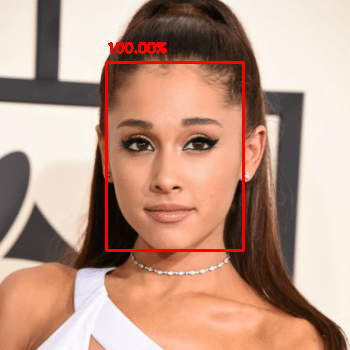

-1

In [37]:
for i in range(0, detections.shape[2]):
  # extract the confidence (i.e., probability) associated with the prediction
  confidence = detections[0, 0, i, 2]
  # filter out weak detections by ensuring the `confidence` is greater than the minimum confidence
  threshold = 0.5
  if confidence > threshold:
    # compute the (x, y)-coordinates of the bounding box for the object
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")
    # draw the bounding box of the face along with the associated probability
    text = "{:.2f}%".format(confidence * 100)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
  
cv2_imshow(image)
cv2.waitKey(0)

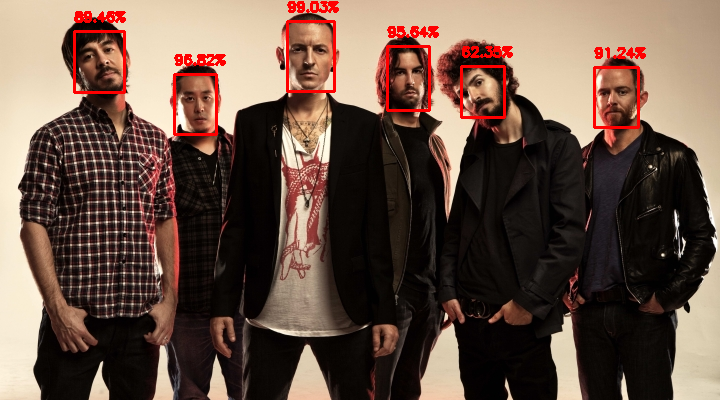

-1

In [38]:
image = cv2.imread('dataset/positive/pic3.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
	confidence = detections[0, 0, i, 2]
	if confidence > threshold:
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(image)
cv2.waitKey(0)

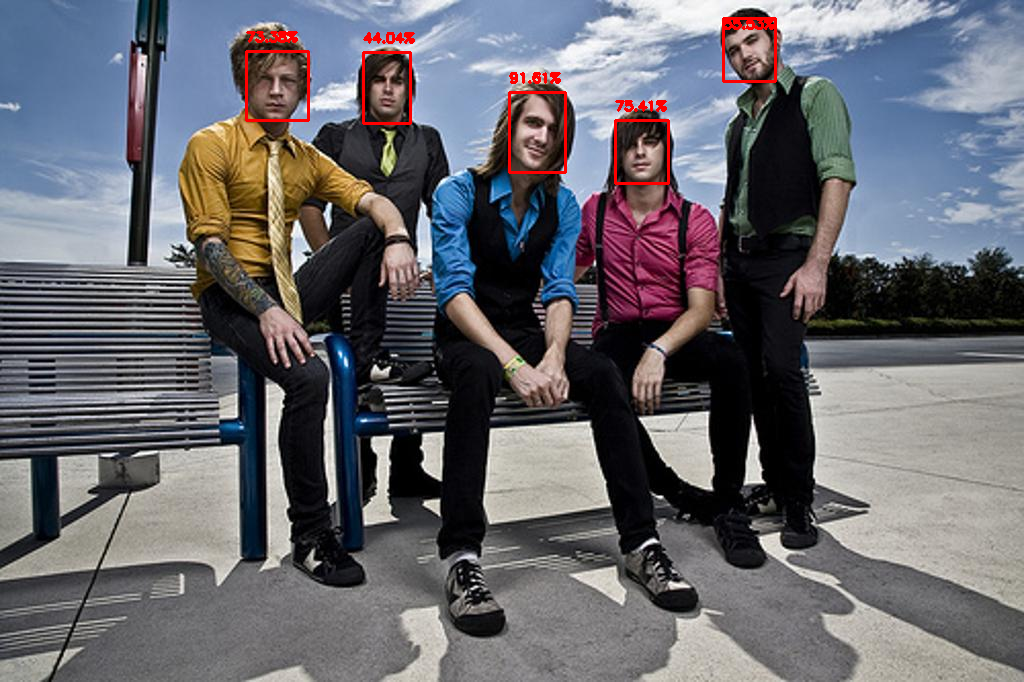

-1

In [39]:
image = cv2.imread('dataset/positive/0_Parade_Parade_0_518.jpg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()
threshold = 0.4
for i in range(0, detections.shape[2]):
	confidence = detections[0, 0, i, 2]
	if confidence > threshold:
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
cv2_imshow(image)
cv2.waitKey(0)